In [4]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider
from IPython.display import display
import bob
import ipywidgets as widgets
from IPython.display import display

# Define the range of the sliders
slider_range = (-np.pi / 2, np.pi / 2)

# Initialize five variables with initial values
values = [0] * 10

# Define the function to plot points based on the variables
def plot_3d_points(coordinates):
    [x, y, z] = coordinates
    # Clear the previous plot and create a new one
    plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')
    
    # Plot points and connect them with lines
    ax.plot(x, y, z, marker='o', linestyle='-', color='b', markerfacecolor='r')
    
    # Set axis limits
    ax.set_xlim([-70, 70])
    ax.set_ylim([-40, 40])
    ax.set_zlim([-300, 10])
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    
    # Show plot
    plt.show()

def plot_2d_points(coordinates):
    [y,z] = coordinates
    # Clear the previous plot and create a new one
    plt.figure(figsize=(8, 6))
    ax = plt.axes()
    
    # Plot points and connect them with lines
    ax.plot(y, z, marker='o', linestyle='-', color='b', markerfacecolor='r')
    
    # Set axis limits
    ax.set_xlim([-100, 100])
    ax.set_ylim([-300, 10])
    
    # Set labels
    ax.set_xlabel('Y')
    ax.set_ylabel('Z')
    
    # Show plot
    plt.show()

    # Plot points and connect them with lines


In [2]:
bob1 = bob.bob()
bob1.disable_torque()
bob1.update_motor_angles()
print(bob1.joint_angles_left)
print(bob1.joint_angles_right)

[8, 354, 299, 319, 349]
[6, 1, 342, 353, 2]


Button(description='Execute Code', style=ButtonStyle())

[347, 1, 358, 349, 3]


<Figure size 640x480 with 0 Axes>

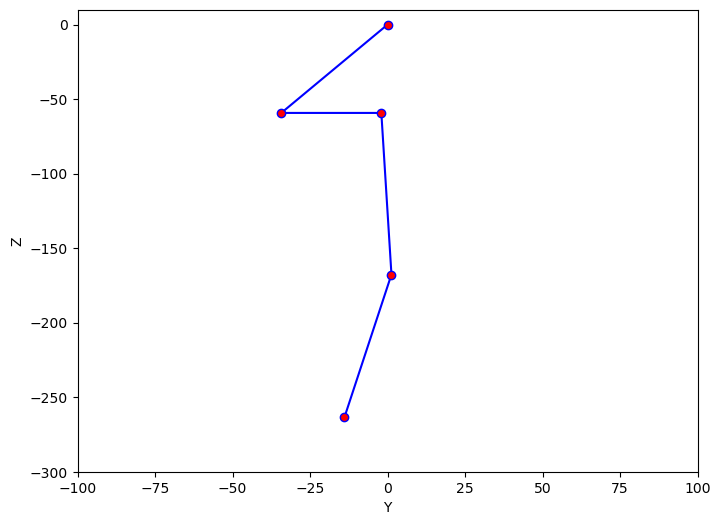

Button was pressed!
[346, 1, 321, 11, 3]


<Figure size 640x480 with 0 Axes>

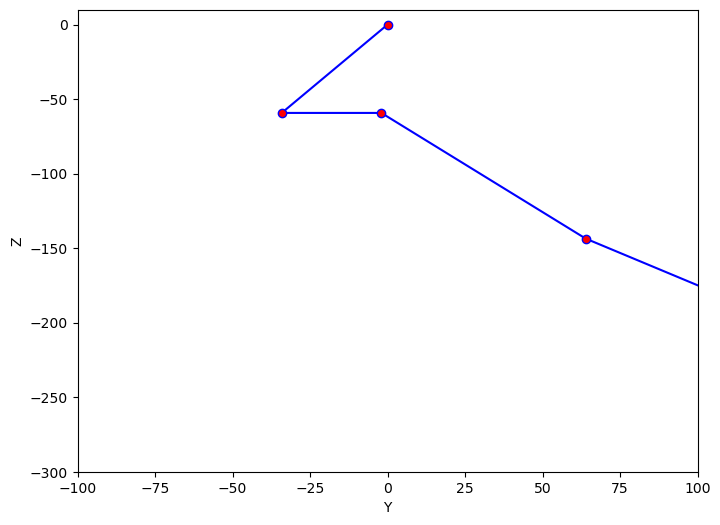

Button was pressed!
[346, 1, 357, 357, 3]


<Figure size 640x480 with 0 Axes>

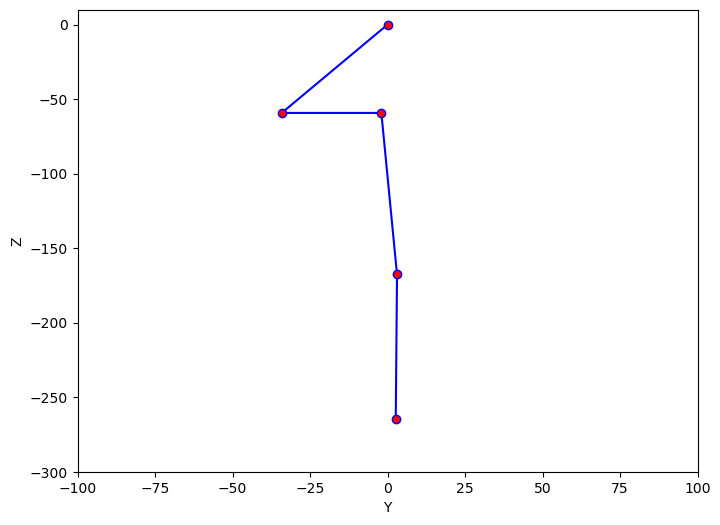

Button was pressed!


In [ ]:
bob1 = bob.bob()
bob1.disable_torque()

def create_button(action_function, description="Press Me"):
    """
    Creates an interactive button that executes a given function when clicked.

    Parameters:
    action_function (function): The function to execute when the button is clicked.
    description (str): Text displayed on the button.
    """
    # Create a button widget with the provided description
    button = widgets.Button(description=description)
    
    # Define what happens when the button is clicked
    def on_button_clicked(b):
        action_function()  # Call the action function
    
    # Link the click event to the button
    button.on_click(on_button_clicked)
    
    # Display the button in the notebook
    display(button)

# Example action function
def my_action():
    plt.clf()
    [left_coordinate,right_coordinate] = bob1.get_coordinates()
    print(bob1.joint_angles_right)
    plot_3d_points(right_coordinate)
    print("Button was pressed!")

# Create and display the button with the action
create_button(my_action, description="Execute Code")


In [ ]:
# Create interactive sliders for each variable
sliders = [
    FloatSlider(value=0, min=slider_range[0], max=slider_range[1], step=0.01, description=f'Var {i+1}')
    for i in range(10)
]

# Create interactive plot
interact(plot_3d_points, a=sliders[0], b=sliders[1], c=sliders[2], d=sliders[3], e=sliders[4],f = sliders[5],g = sliders[6],h = sliders[7],i = sliders[8],j = sliders[9])